# GEOG5995M Final Assignment: Are areas of London with lower employment depravation scores more socially integrated?

Student ID number: 201323937

Installing and reading in packages required for this analysis

In [94]:
pip install geopandas

In [95]:
pip install geoplot

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: geoplot in c:\users\pickl\anaconda3\lib\site-packages (0.5.1)



In [96]:


#for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# for data manipulation
import pandas as pd
import numpy as np

#for statistical modelling/ machine learning

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

#for geovisualisation
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import seaborn as sns

import geoplot as gplt
import geoplot.crs as gcrs


In [97]:
import warnings
warnings.filterwarnings('ignore')

## A brief introduction to the data for this project:


There are three datasets used in this project. The first is a geospatial data set which contains geographic boundaries for LSOAs in London as well as the boundaries for London Boroughs. This data has been used as the basemap for any geovisualisations. The integration dataset is an open source data set produced by the London Data store using data from the Public Attitudes Survey (PAS). This survey asked respondents whether or not they agree that their local area is a place where people get on well together. This measure is not the most accurate when exploring integration within an area but was useful for this project. In the future for a more detailed research study social frontiers may be a better measure of the collective social integration of an area. There are also some issues of place based segregation in data such as this, as the definition of 'your local area' can differ to different people. There needs to be better detail in the survey question design about if 'local area' is the place in which a respondent works as well as lives (if these areas differ, e.g. commuters) and how large the boundary for this may go. 
The third data set used for this project was the IMD (Indices of Multiple Depravation), which is another open source dataset from the London Datastore. This data combined a number of indicators of depravation including economic, social and housing issues. The Economic Scale variable from this data was the key focus, which showed the number of people who were classified as employment deprived. 

### Loading the integration dataset and doing subsequent data cleaning

In [98]:
integration= pd.read_csv("/Users/pickl/OneDrive/Desktop/Geog5995/Assessment/assessment_2/pas-social-integration.csv")

In [99]:
#checking that the data has read in correctly 
integration.head()

,area,year,percent
0,Barking and Dagenham,2012/13,85
1,Barnet,2012/13,96
2,Bexley,2012/13,96
3,Brent,2012/13,94
4,Bromley,2012/13,94


In [100]:
integration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   area     231 non-null    object
 1   year     231 non-null    object
 2   percent  231 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.5+ KB


In [101]:
#checking for missing data in the integration data set
integration.isna()

,area,year,percent
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
226,False,False,False
227,False,False,False
228,False,False,False
229,False,False,False


In [102]:
#checking the sum of n/a values within the data
integration.isna().sum()

area       0
year       0
percent    0
dtype: int64

As shown above this data does not have any n/a values which means there are no values that need to be removed

This data set shows data for each area from multiple years. For this analysis I only want to access a set of data for one year, rather than the collected data for all years. As such, the data needs to be processed to remove any results for any other years.

In [103]:
#using the .loc function to access any values from 2018/19 in the year column
integration.loc[integration['year']=='2018/19']


,area,year,percent
198,Barking and Dagenham,2018/19,84
199,Barnet,2018/19,92
200,Bexley,2018/19,84
201,Brent,2018/19,90
202,Bromley,2018/19,94
203,Camden,2018/19,95
204,Croydon,2018/19,92
205,Ealing,2018/19,91
206,Enfield,2018/19,85
207,Greenwich,2018/19,93


In [104]:
# using the loc function to select rows from the dataset using their numbered index. For this analysis we are only interested in the rows including data from the year 2018/19 and thus the rows numbered 198-230. I am then saving this cleaned data as a new dataset to be used in further analysis.
integration_cleaned= integration.loc['198':'230']
display(integration_cleaned)

,area,year,percent
198,Barking and Dagenham,2018/19,84
199,Barnet,2018/19,92
200,Bexley,2018/19,84
201,Brent,2018/19,90
202,Bromley,2018/19,94
203,Camden,2018/19,95
204,Croydon,2018/19,92
205,Ealing,2018/19,91
206,Enfield,2018/19,85
207,Greenwich,2018/19,93


### Loading the IMD rate dataset and doing subsequent cleaning

In [105]:
#installing a package to allow python to read the excel file

In [106]:
pip install xlrd

In [107]:
IMD= pd.read_excel("/Users/pickl/OneDrive/Desktop/Geog5995/Assessment/assessment_2/indices-of-multiple-deprivation-borough-2007.xls")

In [108]:
#checking that the data has loaded properly
IMD.head()

,Code,area,Average Score,Rank of Average Score,Average Rank,Rank of Average Rank,Extent,Rank of Extent,Local Concentration,Rank of Local Concentration,Income Scale,Rank of Income Scale,Employment Scale,Rank of Employment Scale
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00AA,City of London,12.841085,252.0,10691.908173,253.0,0.036543,209.0,24321.000000,223.0,687.0,353.0,323.75,353.0
2,00AB,Barking and Dagenham,34.493706,22.0,25388.649010,11.0,0.475343,21.0,30564.028412,74.0,44806.0,47.0,13085.25,64.0
3,00AC,Barnet,21.157535,128.0,17960.156767,112.0,0.119743,146.0,28268.823181,149.0,51407.0,38.0,16068.25,53.0
4,00AD,Bexley,16.205327,194.0,13482.175811,199.0,0.074436,177.0,26723.041290,178.0,27351.0,86.0,9728.75,92.0


In [109]:
#checking for n/a responses in data 
IMD.isna()

,Code,area,Average Score,Rank of Average Score,Average Rank,Rank of Average Rank,Extent,Rank of Extent,Local Concentration,Rank of Local Concentration,Income Scale,Rank of Income Scale,Employment Scale,Rank of Employment Scale
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [110]:
#checking for the number of n/a results in the data
IMD.isna().sum()

Code                           1
area                           1
Average Score                  1
Rank of Average Score          1
Average Rank                   1
Rank of Average Rank           1
Extent                         1
Rank of Extent                 1
Local Concentration            1
Rank of Local Concentration    1
Income Scale                   1
Rank of Income Scale           1
Employment Scale               1
Rank of Employment Scale       1
dtype: int64

In [111]:
#using the dropna function to remove any n/a responses
IMD.dropna()

,Code,area,Average Score,Rank of Average Score,Average Rank,Rank of Average Rank,Extent,Rank of Extent,Local Concentration,Rank of Local Concentration,Income Scale,Rank of Income Scale,Employment Scale,Rank of Employment Scale
1,00AA,City of London,12.841085,252.0,10691.908173,253.0,0.036543,209.0,24321.000000,223.0,687.0,353.0,323.75,353.0
2,00AB,Barking and Dagenham,34.493706,22.0,25388.649010,11.0,0.475343,21.0,30564.028412,74.0,44806.0,47.0,13085.25,64.0
3,00AC,Barnet,21.157535,128.0,17960.156767,112.0,0.119743,146.0,28268.823181,149.0,51407.0,38.0,16068.25,53.0
4,00AD,Bexley,16.205327,194.0,13482.175811,199.0,0.074436,177.0,26723.041290,178.0,27351.0,86.0,9728.75,92.0
5,00AE,Brent,29.215632,53.0,22753.276905,30.0,0.268576,74.0,30624.170654,72.0,63767.0,19.0,20175.75,32.0
6,00AF,Bromley,14.361455,228.0,11555.614368,241.0,0.072423,179.0,27132.383606,173.0,34511.0,66.0,12602.00,70.0
7,00AG,Camden,28.622476,57.0,22069.198853,42.0,0.329403,57.0,29711.505219,108.0,48865.0,42.0,17819.50,43.0
8,00AH,Croydon,21.307790,125.0,17449.636068,123.0,0.145474,129.0,28358.354614,144.0,58450.0,25.0,18428.75,41.0
9,00AJ,Ealing,25.102948,84.0,20068.052099,75.0,0.224299,91.0,29601.126511,116.0,60225.0,22.0,19527.75,35.0
10,00AK,Enfield,26.188003,74.0,20267.502190,70.0,0.263469,76.0,29967.277985,100.0,66630.0,17.0,19354.50,37.0


### Loading the lsoa geospatial dataset

In [112]:
lsoa= gpd.read_file("/Users/pickl/OneDrive/Desktop/Geog5995/Assessment/assessment_2/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp") 

Below is a visualisation of the map plotted with the lsoa data set which shows the outline of London and the outline of each borough. This will be used as the basemap for the geovisualisation portion of this project. Lsoa stands for Lower Social Output Area and is a classification of geographic hierarchy designed to improve the reporting of small area statistics (NHS data dictionary, 2023). They are a collection of output areas which are generated with consistent population sizes. LSOAs hold a minimum population of 1000, with a mean of 1500, typically containing 6 output areas.

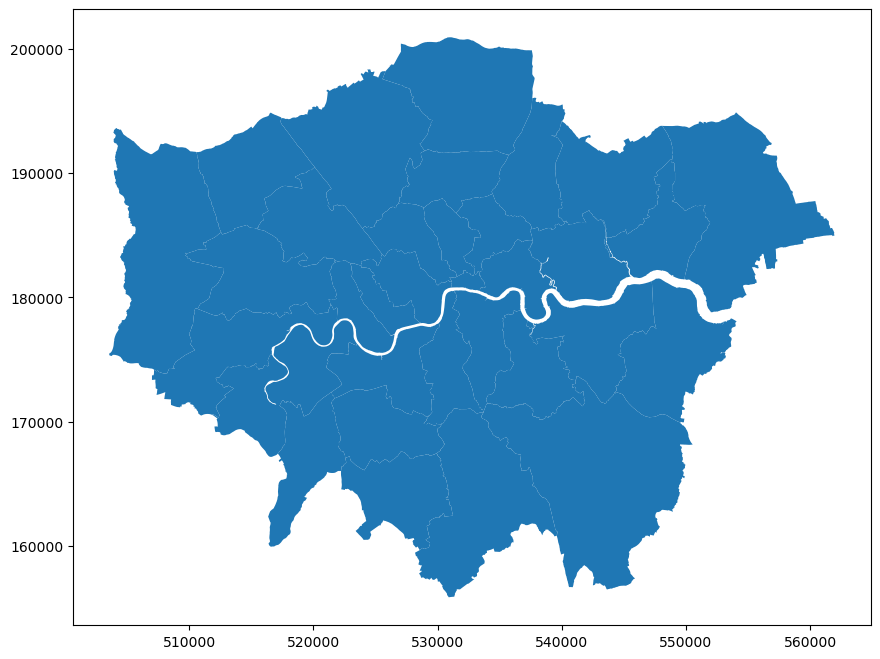

In [113]:
# define the plot size and nummber of subplots 
f, ax = plt.subplots(1, figsize=(16, 8))
# plotting the London map, specifying the subplot axis
lsoa.plot(ax=ax)
# show the plot
plt.show()

### Joining the lsoa and integration_cleaned datasets in order to map integration_cleaned variables onto the lsoa base map.

In [114]:
#renaming the "NAME" column to "area" to match the integration_cleaned dataset for the data join
lsoa = lsoa.rename(columns={'NAME':'area'})

In [115]:
#checking that the column name has changed
lsoa.head()

,area,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [116]:
#using the 'merge' function in geopandas to join the integration_cleaned dataset to the lsoa dataset
lsoa_join_1 = lsoa.merge(integration_cleaned, on='area')

lsoa_join_1.head()

,area,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,year,percent
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",2018/19,96
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",2018/19,92
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",2018/19,94
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",2018/19,92
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",2018/19,91


### Visualising percentages of integration on the lsoa London map using a choropleth map

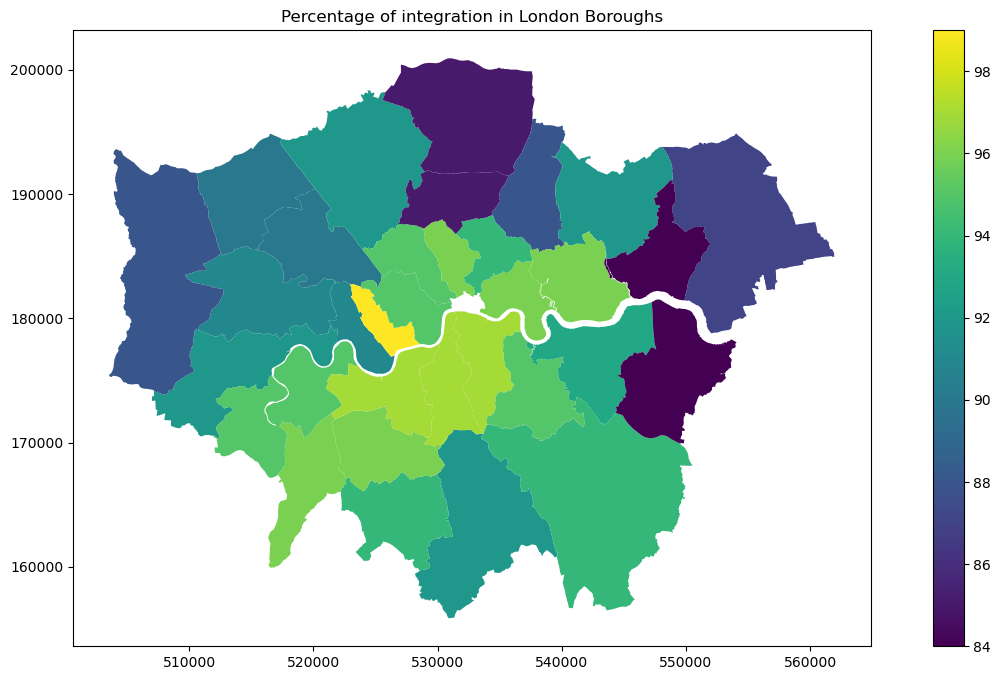

In [117]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the map, specifying to plot the 'percent' column 
# Add legend (legend =True)
# vmin
lsoa_join_1.plot(ax=ax, column ='percent', legend=True)
#add title to map
ax.set_title('Percentage of integration in London Boroughs')
# show the map
plt.show()

This map shows the perecentage of integration per London Borough. This shows the percent who agree that their local area is a place where people from different backgrounds get on well together from the Public Attitudes Survey (London Data Store). Dark blue areas have the lowest integration percentage whilst green and yellow areas have the highest integration percentage. Bexley (on the right hand side just below the Thames) and Enfield (top middle) have some of the lowest integration percentages.

#### From here I then created a new join between the lsoa_join_1 and the IMD data in order to visualise the employment depravation variable across London Boroughs on a  choropleth map

In [118]:
#using the 'merge' function in geopandas to join the IMD dataset to the lsoa_join_1 dataset
lsoa_join_2 = lsoa_join_1.merge(IMD, on='area')

lsoa_join_2.head()

,area,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,year,percent,...,Average Rank,Rank of Average Rank,Extent,Rank of Extent,Local Concentration,Rank of Local Concentration,Income Scale,Rank of Income Scale,Employment Scale,Rank of Employment Scale
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",2018/19,96,...,11442.008303,244.0,0.011723,261.0,22542.168152,254.0,14773.0,155.0,5235.25,184.0
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",2018/19,92,...,17449.636068,123.0,0.145474,129.0,28358.354614,144.0,58450.0,25.0,18428.75,41.0
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",2018/19,94,...,11555.614368,241.0,0.072423,179.0,27132.383606,173.0,34511.0,66.0,12602.00,70.0
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",2018/19,92,...,19567.047489,83.0,0.128808,136.0,28012.474976,155.0,41050.0,53.0,12621.00,69.0
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",2018/19,91,...,20068.052099,75.0,0.224299,91.0,29601.126511,116.0,60225.0,22.0,19527.75,35.0


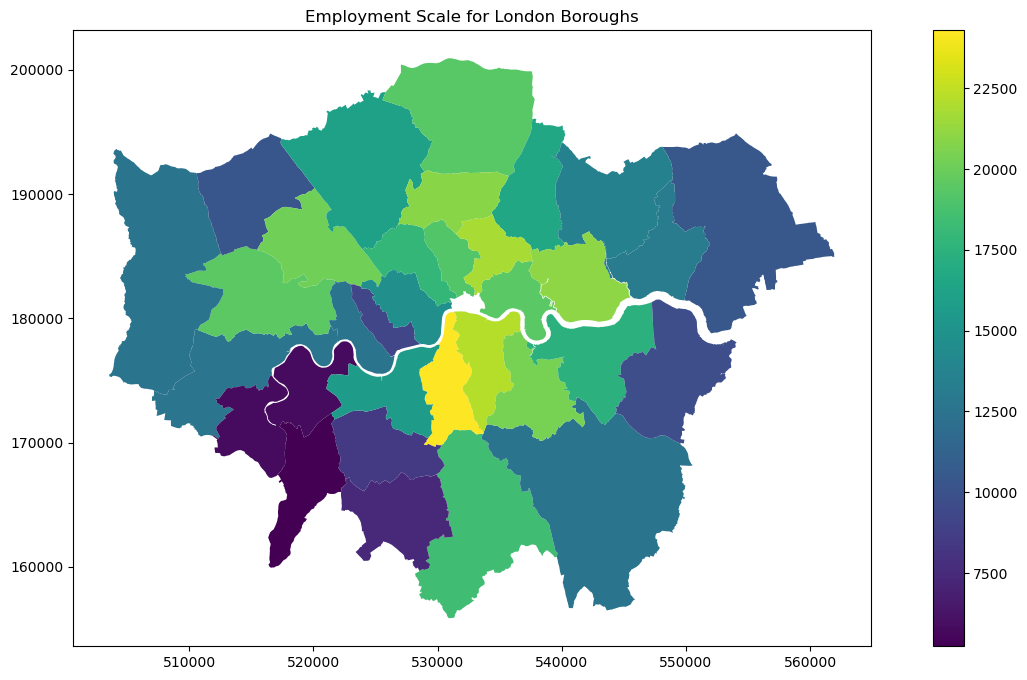

In [119]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the map, specifying to plot the 'Employment Scale' column 
# Add legend (legend =True)
# vmin
lsoa_join_2.plot(ax=ax, column ='Employment Scale', legend=True)
#add title to map
ax.set_title('Employment Scale for London Boroughs')
# show the map
plt.show()

This map shows the employment depravation scale per London Borough. The employment depravation scale is the number of people who are employment deprived. This is a measure of the proportion of the population of working age who are involuntarily excluded from the labour market (Trust for London). People are included in this measure if they are able to work but are unemployed, suffer from a disability or hold caring responsibilities which mean they are unable to work. As shown in the scale on the right hand side the areas with the highest employment depravation or the areas with the most people suffering from employment depravation are the yellow and green areas. The areas with the lowest employment depravation are shown in dark blue.

### To aid in ease of comparison between the two maps, I have plotted them side by side. 

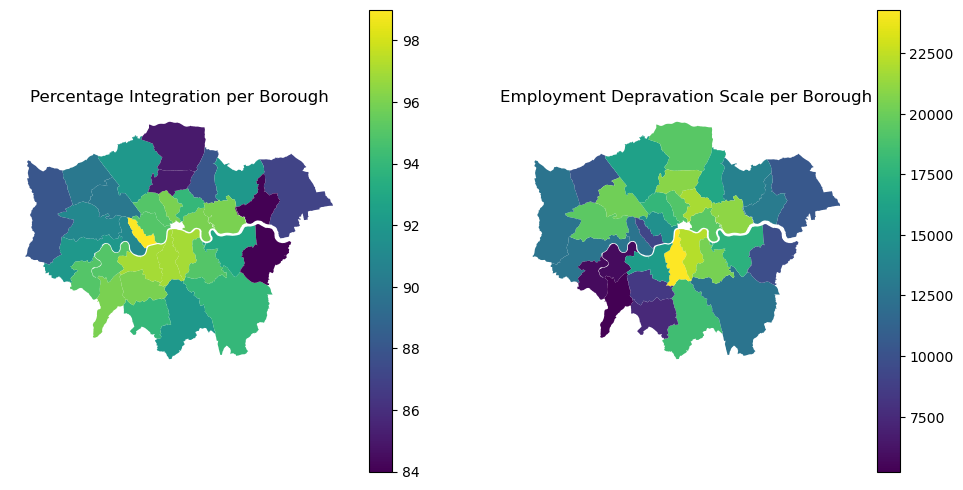

In [120]:
#creating a figure with two maps or subplots 
f,ax = plt.subplots(1,2, figsize=(12,6))

#plotting the integration percentage variable
lsoa_join_2.plot(ax=ax[0], column ='percent', legend=True)

#plotting the employment scale variable
lsoa_join_2.plot(ax=ax[1], column ='Employment Scale', legend=True)

#Giving integration subplot title
ax[0].set_title('Percentage Integration per Borough')

#Giving employment scale subplot title
ax[1].set_title('Employment Depravation Scale per Borough')

# make axis invisible for subplot 1
ax[0].set_axis_off()

# make axis invisible for subplot 1
ax[1].set_axis_off()

# show figure
plt.show()

Areas such as Enfield and Haringey (top middle two) have some of the lowest integration and very high employment depravation. The opposite can be said of areas such as Richmond and Kingston (bottom left), which have very high integration and low employment depravation. Visually, there is a correlation between these two variables for many areas. This isn't the case for every Borough, however. Bexley (far right just below the Thames) has a low integration percentage and a fairly low employment depravation score. It is difficult from these maps alone to tell whether these two variables are correlated. The below non-spatial graph will hopefully help to decipher if there is any causal relationship and if it is statistically significant.

### Non-spatial data visualisations

<Axes: xlabel='percent', ylabel='Employment Scale'>

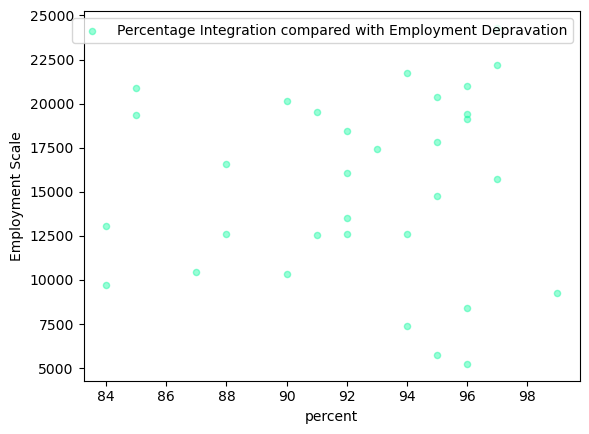

In [121]:
#plot a scatterplot of employment score and integration percentage 
lsoa_join_2.plot.scatter(x='percent', y='Employment Scale', s=20, c='mediumspringgreen', alpha=0.4, label='Percentage Integration compared with Employment Depravation')


This scatter plot shows that there is not much of a visible correlation between these two variables. The below scatterplot includes a line of best fit in order to make the relationship clearer.

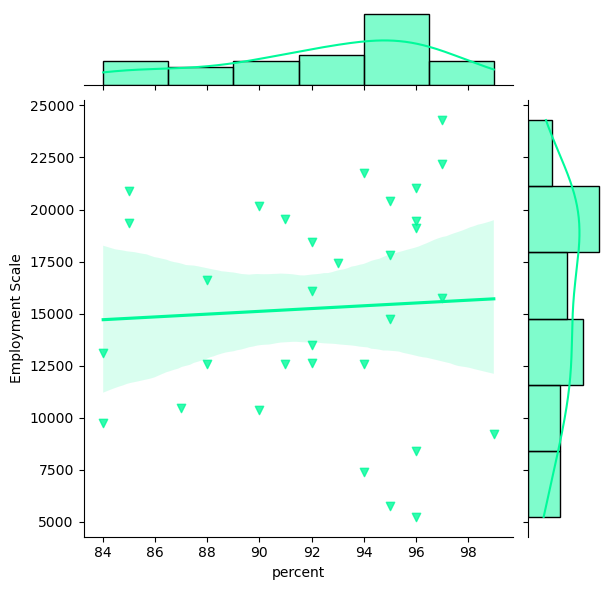

In [122]:
# plot a reg plot
sns.jointplot(x='percent',y='Employment Scale', color='mediumspringgreen', kind ='reg',data=lsoa_join_2,
             height=6, marker='v');

The line of best fit on this plot is very slightly positively skewed. The data seems to be distributed quite evenly across the plot with no clear pattern, dispite the very slight slope on the line of best fit. It can be discerned that there may not be a strong correlation between level of employment deprivation and integration percentage. To prove this, I have below calculated the correlation coefficient for the two variables.

### Statistical testing

In [124]:
#statistical tests to discern the relationship between the two variables
correlation_coefficient = lsoa_join_2['percent'].corr(lsoa_join_2['Employment Scale'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.053992301311424205


This correlation coefficient indicates a very weak positive correlation. Whilst the correlation coefficient is above 0.05 and thus is statistically significant enough to accept the null hypothesis (that areas with higher employment depravation have lower levels of integration), for this specific research I do not believe this correlation to be strong enough to be useful for policy making of public good. Whilst some areas with higher integration percentages do have lower employment depravation scores, these two things do not seem to have a strong relationship with each other and have likely been caused by other mitigating factors.

### Conclusion

In this project I have explored the relationship between social integration and employment depravation to assess whether there is a correlation between the two within the London Boroughs. I have found there to be a weak relationship between these two variables through a correlation coefficient test and visualisation on a regression plot. I have also plotted both variables onto choropleth maps for ease of visualisation. These maps are useful for policy reports as well as usage in news articles due to their ease of viewing and their storytelling aspects (e.g. they can portray what the data is saying in a visual narrative for an audience who may otherwise be unfamiliar with interpreting data). Ultimately, further investigation is needed in a larger scale project to truly understand the relationship between these two variables and to discern other potential causes of differing levels of social integration.


## References
<p><a href="https://data.london.gov.uk/dataset/social-integration-by-borough">[1]</a>Social Integration Data</p>
<p><a href="https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london">[2]</a>London LSOA Boundary Data</p>
<p><a href="https://data.london.gov.uk/dataset/indices-multiple-deprivation-borough">[3]</a>London IMD Data</p>
<p><a href="https://migrationobservatory.ox.ac.uk/resources/reports/integration-in-the-uk-understanding-the-data/">[4]</a>Understanding Immigration Data</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5995">[5]</a>GEOG5995M course materials</p>
<p><a href="https://www.google.com/url?q=https://www.sharpsightlabs.com/blog/pandas-loc/&sa=D&source=docs&ust=1702567293080648&usg=AOvVaw3PogizGMBgFmy6uE2AGpPA">[6]</a>Help with Pandas Loc Function</p>
<p><a href="https://www.datadictionary.nhs.uk/nhs_business_definitions/lower_layer_super_output_area.html">[7]</a>NHS Data Dictionary</p>


#### Word Count Including Introductory Markdown Document
2245